# MUN 87/1

* [Verteilung der Funde](#Verteilung-der-Funde)
* [Keramische Stilgruppen](#Keramische-Stilgruppen)

In [49]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from mpl_toolkits.axes_grid1 import make_axes_locatable

# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

In [50]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/1'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
# df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,bef_nr,Komplex,Individuum,Typ,Anzahl,Gewicht,Gr_Clist,Art,Tiefe
0,MUN,87/1,87/1-0-2,-3:1,EBA (?),1,155,120,K,60.0
1,MUN,87/1,87/1-0-2,-6:2,EBA,1,504,200,K,90.0
2,MUN,87/1,87/1-0-1,None,None,1,92,70,Schlacke,62.0
3,MUN,87/1,87/1-0-1,None,None,5,229,70,Schlacke,44.0
4,MUN,87/1,87/1-0-1,,None,7,20,30,Schlacke,62.0


In [51]:
df_pivot = df.pivot_table(values = 'Gewicht', index = ['Komplex', 'Tiefe'], columns = 'Art', aggfunc = sum, fill_value = 0)
df_pivot.rename(columns={'K': 'Keramik', 'Tuyere': 'Tuyère'}, inplace=True)
df_pivot

Art             Eisen  Keramik  Ofenwand  Schlacke  Sonder  Tuyère
Komplex  Tiefe                                                    
87/1     0.0        0        0         9         0       0       0
87/1-0-1 0.0        0      409       415       464       0      23
         44.0       0        0        26      4269       0       0
         62.0       0        0         0      2417       0       0
87/1-0-2 40.0       0     2366        24       159       0       8
         50.0       0     1351        44        87       0      19
         60.0       0     1271        13       133       0       0
         70.0       0     1936       769        58       0       0
         80.0       0     1132       179        18       9      10
         90.0       0     4018        73        38     142       0
         107.0      1       64         2        16       0       0

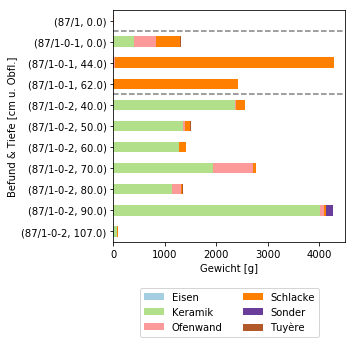

In [52]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Befund & Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.axhline(.5, color='grey', linestyle = '--')
plt.axhline(3.5, color='grey', linestyle = '--')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
# Zählung der X-Achse manuell festlegen
plt.xticks(np.arange(abs(xlim[0]), abs(xlim[1])+1, 1000.0))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-12_MUN87-1_VerteilungFunde.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MUN 87/1** Fundverteilung

In [53]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Komplex', columns = 'Art', aggfunc = sum, fill_value = 0, margins = True)
df_pivot.rename(columns={'K': 'Keramik'}, inplace=True)
df_pivot

Art,Eisen,Keramik,Ofenwand,Schlacke,Sonder,Tuyere,All
Komplex,,,,,,,
87/1,0.0,0.0,9.0,0.0,0.0,0.0,9.0
87/1-0-1,0.0,409.0,441.0,7150.0,0.0,72.0,8072.0
87/1-0-2,1.0,12138.0,1104.0,509.0,151.0,37.0,13940.0
All,1.0,12547.0,1554.0,7659.0,151.0,109.0,22021.0


In [54]:
df1 = df[df['Komplex'] == '87/1-0-1']
df_p1 = df1.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df2 = df[df['Komplex'] == '87/1-0-2']
df_p2 = df2.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)

In [55]:
fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121)
df_p1.plot(kind='pie', autopct='%.0f %%' )
plt.ylabel('')
plt.title('MUN 87/1-0-1')

plt.subplot(122)
df_p2.plot(kind='pie', autopct='%.0f %%' )
plt.ylabel('')
plt.title('MUN 87/1-0-2')

# plt.savefig('output/figs/2.2 Funde – Herkunft Flusslauf 1.pdf')
plt.show()

In [56]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-15_MUN87-1_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,Eisen,1,0.1,0.00,0.0
1,Keramik,406,52.6,12.55,57.0
2,Ofenwand,23,3.0,1.55,7.1
3,Schlacke,332,43.0,7.66,34.8
4,Sonder,3,0.4,0.15,0.7
5,Tuyere,7,0.9,0.11,0.5


## Keramische Stilgruppen

In [57]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/1')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
# df['Typ'] = df['Typ'].replace('','(?)')
# df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
# df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,bef_nr,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,MUN,87/1,87/1-0-2,-3:1,EBA (?),155,120,K,60
1,MUN,87/1,87/1-0-2,-6:2,EBA,504,200,K,90
2,MUN,87/1,87/1-0-2,-4:2,EBA,50,120,K,70
3,MUN,87/1,87/1-0-2,-5:7,EBA,38,70,K,80
4,MUN,87/1,87/1-0-2,-3:4,EBA (?),44,120,K,60


In [58]:
np.sum(df['Gewicht'])

12547

In [59]:
df_pivot = df.pivot_table(values = 'Gewicht', index = ['Komplex', 'Tiefe'], columns = 'Typ', aggfunc = sum, fill_value = 0)
df_pivot

Typ              EBA  EBA (?)  KON (?)  PKM (?)
Komplex  Tiefe                                 
87/1-0-1 0         0        0        0      170
87/1-0-2 40     2050      316        0        0
         50      947      242        0      132
         60      921      339        0       11
         70     1662      267        5        2
         80      836      185        0      111
         90     3950       60        0        8
         107      64        0        0        0

> ToDo: evtl. Chronologieschema zur Abfolge der Stilgruppen in die DB ablegen

In [60]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Befund & Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.axhline(.5, color='grey', linestyle = '--')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
# Zählung der X-Achse manuell festlegen
plt.xticks(np.arange(abs(xlim[0]), abs(xlim[1])+1, 1000.0))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-12_MUN87-1_KeramikStilgruppen.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MUN 87/1** keramische Stilgruppen

In [61]:
df_pivot.plot(kind = 'line', cmap = 'Paired')
plt.axvline(.5, color='grey', linestyle = '--')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.xticks(rotation=90)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 8 Text xticklabel objects>)

In [62]:
df_pivot.plot(kind = 'area', cmap = 'Paired')
plt.axvline(.5, color='grey', linestyle = '--')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.xticks(rotation=90)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 8 Text xticklabel objects>)

## Fragmentierung der Keramik

In [15]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/1')
           AND ((t_Obj.Komplex) = '87/1-0-2')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
# df['Typ'] = df['Typ'].replace('','(?)')
# df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
# df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,objID,bef_nr,Komplex,Gewicht,Gr_Clist,Art,Tiefe
0,326,87/1,87/1-0-2,155,120,K,60
1,329,87/1,87/1-0-2,504,200,K,90
2,1443,87/1,87/1-0-2,50,120,K,70
3,1444,87/1,87/1-0-2,38,70,K,80
4,1445,87/1,87/1-0-2,44,120,K,60


In [16]:
df_pivot = df.pivot_table(values = 'objID', index = 'Gr_Clist', aggfunc = len)
df_pivot = df_pivot.rename(index={500: '>200'})
df_pivot

Gr_Clist
30      30
70      75
120     24
200     10
>200     1
Name: objID, dtype: int64

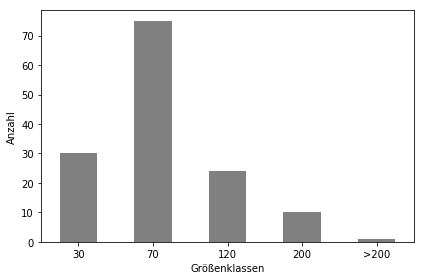

In [17]:
df_pivot.plot(kind = 'bar', color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.tight_layout()
plt.savefig('../output/figs/9-12_MUN87-1_KeramikFragmentierung.pdf')
plt.show()

> **MUN 87/1** Fragmentierungsgrad

## Gefäßformen

In [18]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Form_Gef, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/1')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
# df['Typ'] = df['Typ'].replace('','(?)')
# df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
# df = df.dropna(subset=['Tiefe'])

# display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [19]:
df_pivot = df.pivot_table(values = 'objID', index = ['Komplex', 'Tiefe'], columns = 'Form_Gef', aggfunc = len)

In [20]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
plt.rcdefaults()
%matplotlib inline

In [21]:
#fig = plt.figure(1)
#fig.set_size_inches(5, 7.5)
ax = plt.gca()

im = plt.imshow(df_pivot, interpolation='nearest', cmap='RdYlBu')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anzahl')

plt.savefig('../output/figs/9-12_MUN87-1_Gef-Formen.pdf', bbox_inches='tight')
plt.show()

In [22]:
# stellte die Pandas-Einstellungen für Plots wieder her
# pd.options.display.mpl_style = 'default'
#import seaborn as sns
#sns.set()
#%matplotlib inline

In [23]:
df_pivot = df.pivot_table(values = 'objID', index = ['Komplex', 'Tiefe'], columns = 'Form_Gef', aggfunc = len, fill_value = '', margins = True)
df_pivot

Form_Gef       A2 A2 (?) A2/A3 (?) B1 (?) B2 (?) B2/A2 (?)  B4 B4 (?)  \
Komplex  Tiefe                                                          
87/1-0-1 0                                                              
87/1-0-2 40                                    1             6      4   
         50                                                  3     11   
         60                      2                           2      1   
         70                                              1   6      2   
         80            1                1                    1      2   
         90     2                1                           2      1   
All             2      1         3      1      1         1  20     21   

Form_Gef       E3/F3 (?) G2 (?) G4 G5 I3 I3 (?)   All  
Komplex  Tiefe                                         
87/1-0-1 0             1                          1.0  
87/1-0-2 40                                      11.0  
         50                      1            1  16.0  
         60                         1  1          7.0  
         70                      2               11.0  
         80                         1             6.0  
         90                   1                   7.0  
All                    1      1  3  2  1      1  59.0

In [24]:
df_pivot.to_latex('../output/tabs/9-12_MUN87-1_Gef-Formen.tex')

## Verzierungselemente

In [42]:
sql = """SELECT
            t_Ort.ort_kurz,
            t_Komplex.bef_nr,
            t_Obj.objID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'MUN')
            AND ((t_Komplex.bef_nr) = '87/1')
            AND ((t_Obj.Komplex) = '87/1-0-2')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Verz.verzName_alt) Like 'V%')
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,bef_nr,objID,Komplex,Individuum,verzName,pos
0,MUN,87/1,326,87/1-0-2,-3:1,01.8,2 Rand
1,MUN,87/1,329,87/1-0-2,-6:2,08,5 Bauch
2,MUN,87/1,1443,87/1-0-2,-4:2,02.1,1 Innen
3,MUN,87/1,1443,87/1-0-2,-4:2,04.11,1 Innen
4,MUN,87/1,1443,87/1-0-2,-4:2,01.1,3 Hals


In [43]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
df_pivot

verzName,01.1,01.11,01.5,01.6,01.8,02.1,02.2,02.4,04.11,04.12,04.15,04.16,04.18,04.19,08
pos,,,,,,,,,,,,,,,
1 Innen,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0
2 Rand,0,2,0,0,3,4,0,1,0,0,0,0,0,0,0
3 Hals,2,10,1,1,0,28,1,0,0,0,0,1,0,0,12
4 Schulter,0,0,0,1,0,7,1,0,4,19,3,0,2,7,1
5 Bauch,0,0,0,0,0,1,0,0,0,0,0,0,0,0,45
6 Bodenansatz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13


In [44]:
df_pivot = df_pivot.sort_index(ascending=True)

In [45]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
plt.rcdefaults()
%matplotlib inline

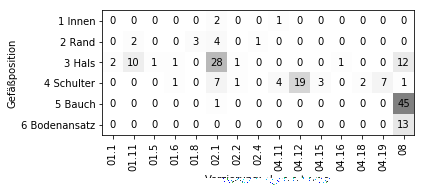

In [46]:
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/9-12_MUN87-1-0-2_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

> **MUN 87/1-0-2** Verzierungselemente

n

In [47]:
df['objID'].nunique()

91

In [48]:
# pd.options.display.mpl_style = 'default'

## Schlacken

In [32]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Schlacke_Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/1')
           AND ((t_Obj.Art) Like '%Schlacke%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
# df['Typ'] = df['Typ'].replace('','(?)')
# df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
# df = df.dropna(subset=['Tiefe'])
# display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [33]:
np.sum(df['Gewicht'])

7659

In [34]:
df_pivot = df.pivot_table(values = 'Gewicht', index = ['Komplex', 'Tiefe'], columns = 'Schlacke_Typ', aggfunc = sum, fill_value = 0)
df_pivot

Schlacke_Typ    1a   2a    2b   4   4a   4b    6
Komplex  Tiefe                                  
87/1-0-1 0       0   75   302  87    0    0    0
         44      0  204  2937   0  342  557  229
         62      1    0  2324   0    0    0    0
87/1-0-2 40      0   18     7   0   52   82    0
         50      0    0     0   0   87    0    0
         60      0    0    76   0   47   10    0
         70      0   21    18   0   19    0    0
         80      0    3     0   0   15    0    0
         90      0    0     0   0   38    0    0
         107     0    0     0   0   16    0    0

In [35]:
df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.axhline(2.5, color='grey', linestyle = '--')
plt.gca().invert_yaxis()
plt.xlabel('Gewicht [g]')
plt.ylabel('Befund, Tiefe [cm u. Obfl.]')
plt.gca().set_aspect(500)
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=4, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-12_MUN87-1_Schlacken.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [36]:
# Diagramm auf 100% - Prozentwerte für jede Zeile ausrechnen:
df_perc = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
# df_perc

In [37]:
ax = df_perc.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.axhline(2.5, color='grey', linestyle = '--')
plt.gca().invert_yaxis()
plt.xlabel('Prozent (Gewicht)')
plt.ylabel('Befund, Tiefe [cm u. Obfl.]')
plt.xlim(0,1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=4, borderaxespad = 0.)
plt.tight_layout()
# plt.savefig('../output/figs/9-12_MUN87-1_Schlacken.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [38]:
df_pivot = df_pivot.reset_index()
# Matrix nach Teilen 'zerschneiden'
df_101 = df_pivot[df_pivot['Komplex'] == '87/1-0-1']
df_102 = df_pivot[df_pivot['Komplex'] == '87/1-0-2']
# Spalte Komplex ausschneiden -- verursacht fiese Fehlermeldung!
df_101.drop(['Komplex'], inplace = True, axis = 1)
df_102.drop(['Komplex'], inplace = True, axis = 1)
# Tiefe wieder als Index rein
df_101 = df_101.set_index('Tiefe')
df_102 = df_102.set_index('Tiefe')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


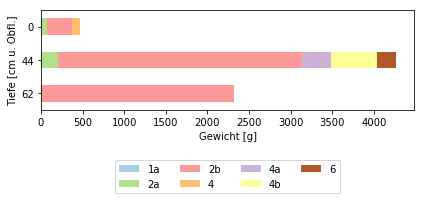

In [39]:
df_101.plot(kind = 'barh', stacked=True, cmap = 'Paired', legend = None)
plt.gca().invert_yaxis()
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().set_aspect(400)
lgd = plt.legend(bbox_to_anchor=(0.5, -0.5), loc = 9, ncol=4, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-12_MUN87-101_Schlacken.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [40]:
ax = df_102.plot(kind = 'barh', stacked=True, cmap = 'Paired', legend = None)
plt.gca().invert_yaxis()
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.xlim([0,170]) 
plt.savefig('../output/figs/9-12_MUN87-102_Schlacken.pdf', bbox_inches='tight')
plt.show()

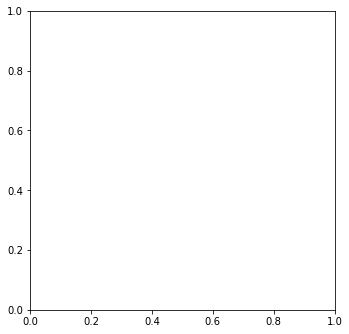

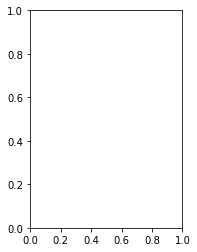

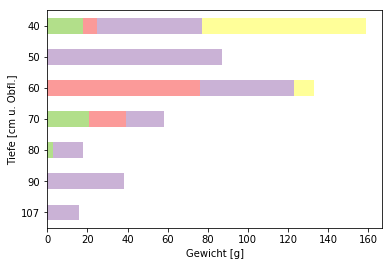

In [41]:
fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121)

df_101.plot(kind = 'barh', stacked=True, cmap = 'Paired', legend = None)
plt.gca().invert_yaxis()
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')

plt.subplot(122)
df_102.plot(kind = 'barh', stacked=True, cmap = 'Paired', legend = None)
plt.gca().invert_yaxis()
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')

# plt.savefig('../output/figs/9-8_PIK87-1_Fragmentierung_B.pdf', bbox_inches='tight')
plt.show()